# Trusted zone - Household

In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.precision', 3)

import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ipynb.fs.full.utils import  DBtable_to_df

In [2]:
df = DBtable_to_df('../../household.duckdb','household')

## Missing values

we check if there are null values with `isnull().sum()`, and as we can see none of the columns have null values, so it could be the case that these missing values were hidden.

In [3]:
df.isnull().sum()  # there are no missing values is empty

section                                                                   0
population                                                                0
single_women_aged_16_to_64                                                0
single_men_aged_16_to_64                                                  0
single_women_aged_65_or_over                                              0
single_men_aged_65_or_over                                                0
adult_women_with_one_or_more_minors                                       0
adult_men_with_one_or_more_minors                                         0
two_adults_from_16_to_64_and_without_minors                               0
two_adults_one_at_least_65_and_without_minors                             0
two_adults_and_one_minor                                                  0
two_adults_and_two_minors                                                 0
two_adults_and_three_or_more_minors                                       0
two_adults_o

In the profiling we already saw the maximum and minimum values, and in the maximum values we did not see any inconsistency (we did not find any 9999999999), but in the minimum values we saw that there were a few zeros, so the null values could be hidden here.

In [4]:
dftmp = df.replace(0,np.nan)
count = dftmp.isnull().mean()


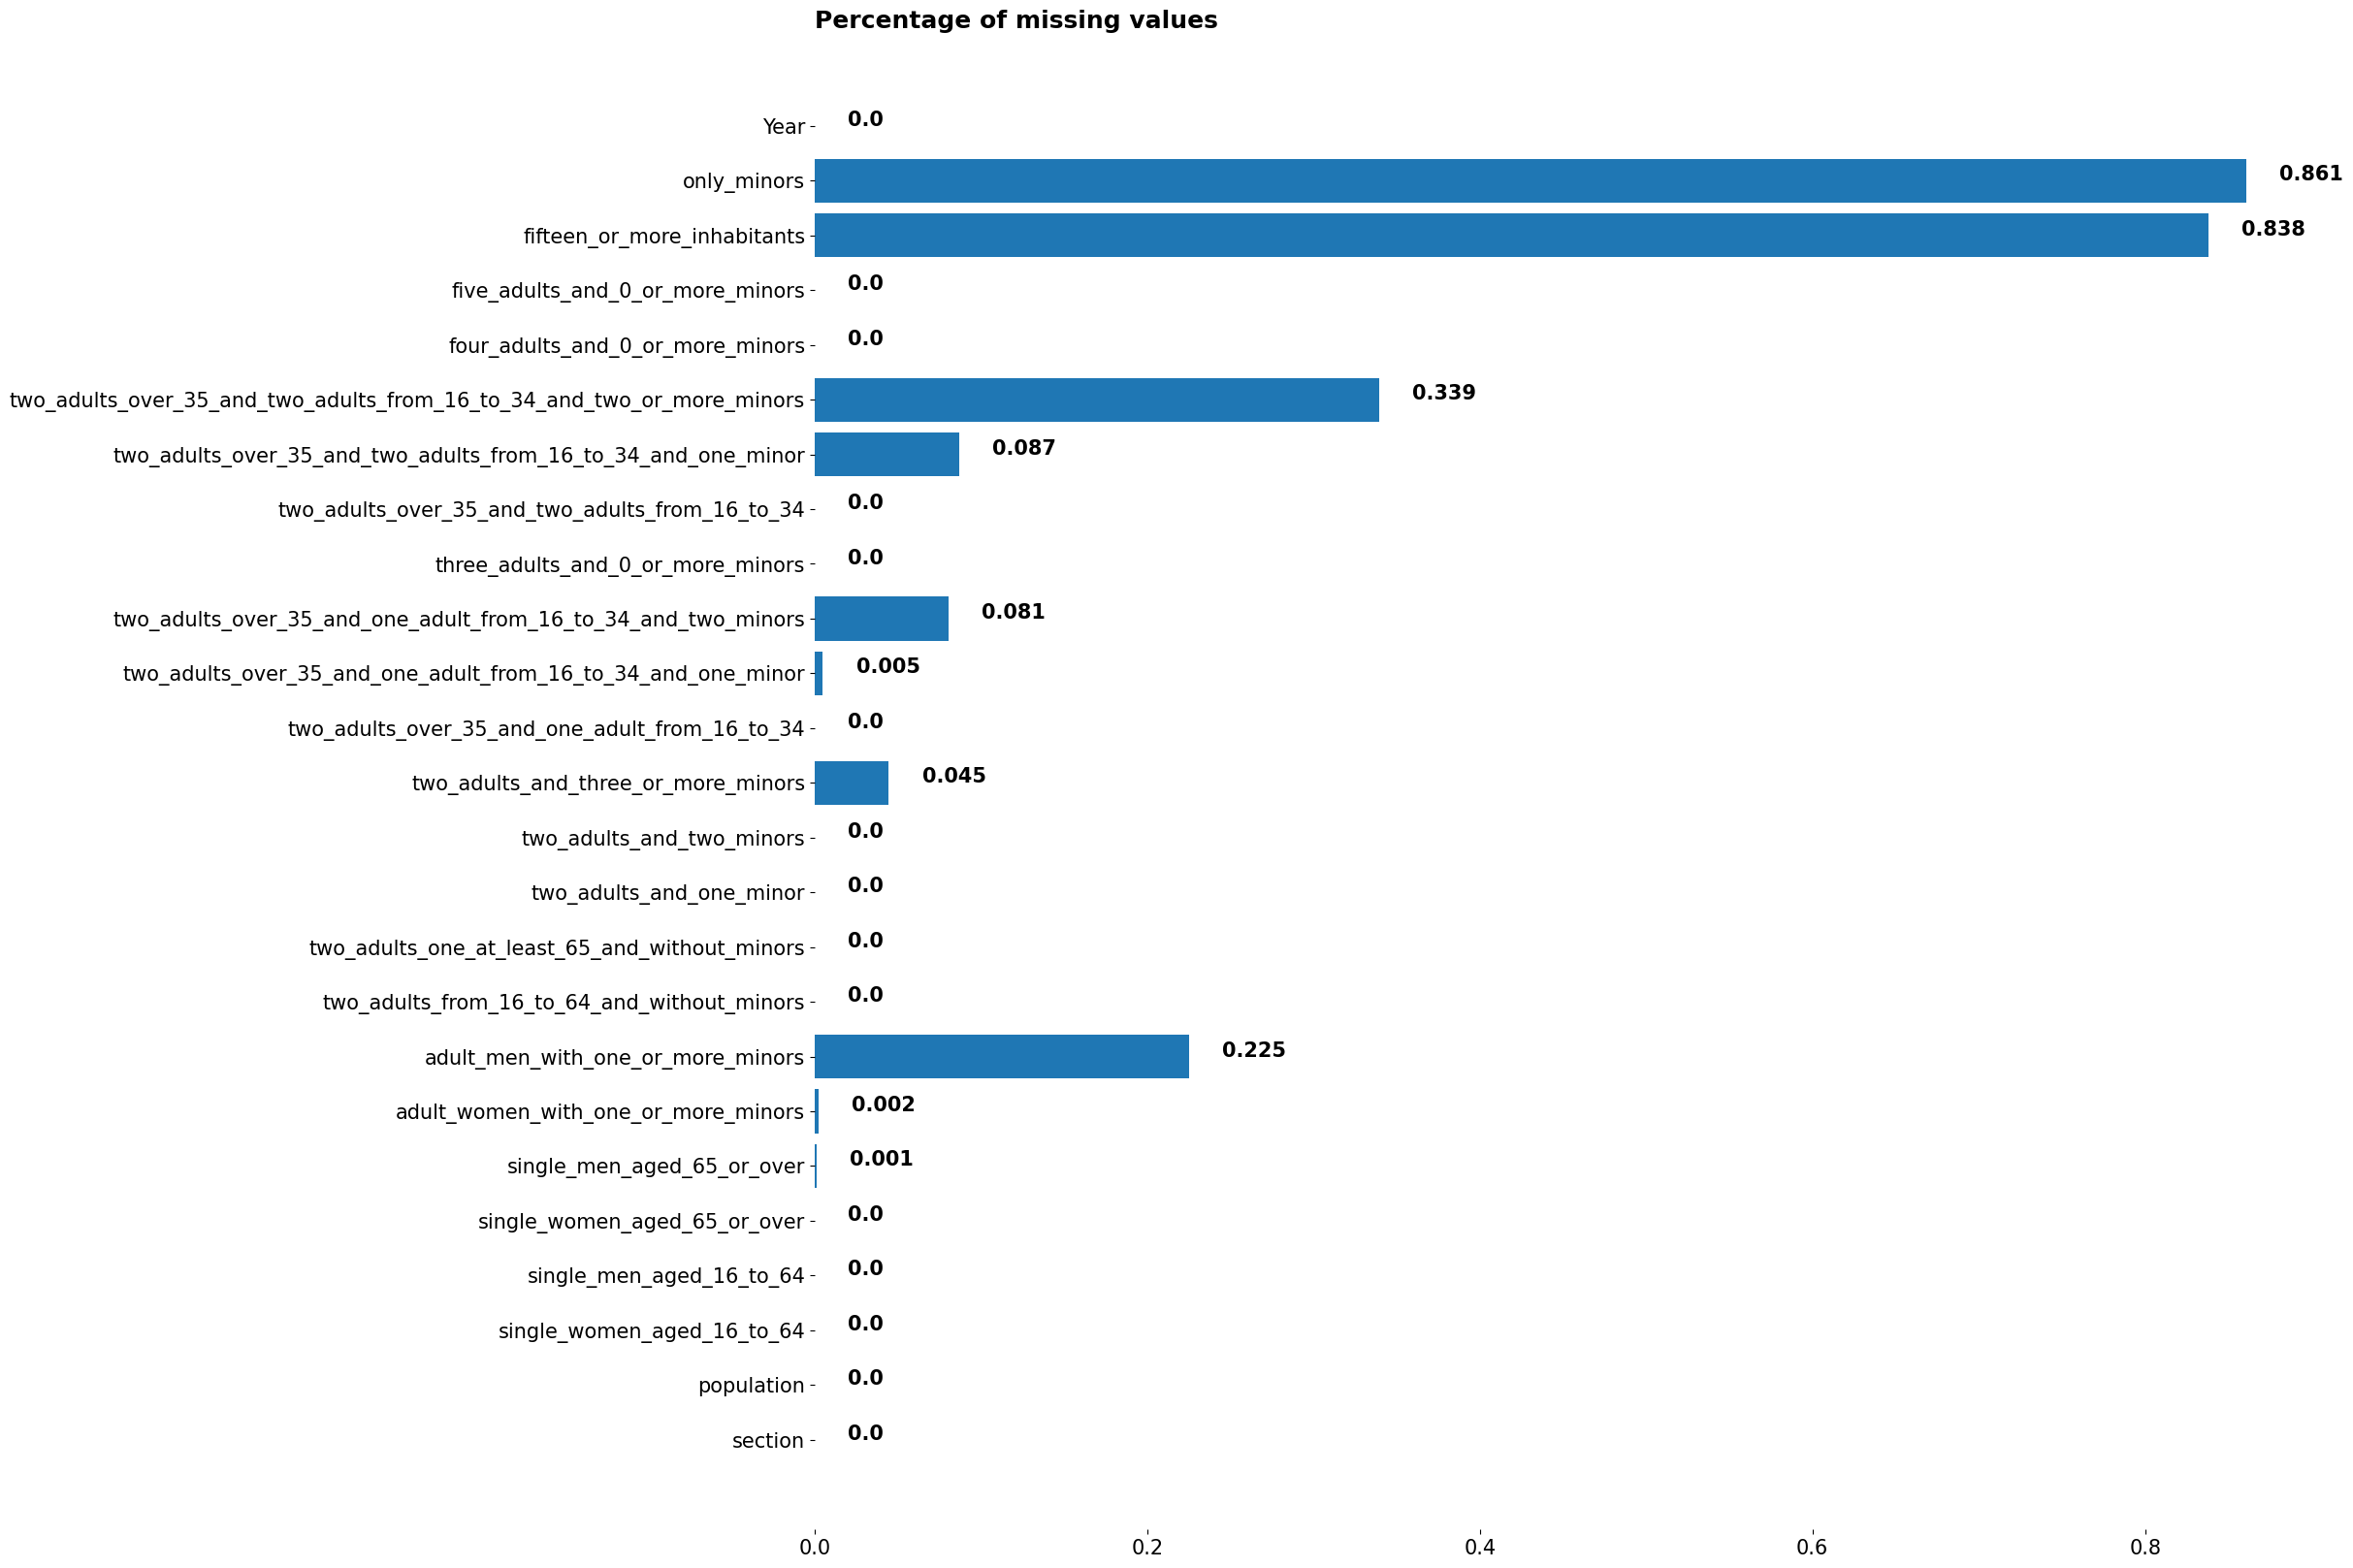

In [5]:
fig, ax = plt.subplots(figsize =(20, 20))
ax.barh(df.columns,count)

for s in ['top', 'bottom', 'left', 'right']: # Remove axes splines
    ax.spines[s].set_visible(False)

for i in ax.patches: # Add annotation to bars
    plt.text(i.get_width()+0.02, i.get_y()+0.4, str(round((i.get_width()), 3)), fontsize = 15, fontweight ='bold')

ax.set_title('Percentage of missing values', loc ='left', fontsize=18,fontweight='bold' )
ax.tick_params(axis = 'both', labelsize=15)
plt.show()

The graph above shows us in percentage the number of zeros that exist in the columns.

The columns with a higher percentage (grater than 25%) are `only_minors` with 86.1%, `fifteen_or_more_inhabitants` with 83.8% and `two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors` with 33.9%. All these values do not seem to be null, since these situations are rare and it is logical  not to find this type of distribution in Spain households.

Although it is rare that there are so many zeros in `adult_men_with_one_or_more_minors` compared to `adult_women_with_one_or_more_minors`, where the first has a percentage of 22.5% and the second one with 0.2%. It is quite surprising that there are more men with minors than women, when it is said that children are usually more affectionate towards women. However, this is a social prejudice and since we don't have any logical argument to refute it, we have decided no to impute it.

Regarding the rest they seems quite cohherents in our context.